## Nearest Neighbor item based Collaborative Filtering

![image.png](attachment:image.png)

Source: https://towardsdatascience.com

# Task 1: Data Processing

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
movies_df = pd.read_csv('movies.csv',
                        usecols=['movieId', 'title'],
                        dtype={'movieId': 'int64', 'title': 'str'})
rating_df = pd.read_csv('ratings.csv',
                        usecols=['userId', 'movieId', 'rating'],
                        dtype={'userId': 'int64', 'movieId': 'int64', 'rating': 'float64'})

In [3]:
print(movies_df.shape)
movies_df.head()

(9742, 2)


,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [5]:
print(rating_df.shape)
rating_df.head()

(100836, 3)


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [7]:
# Merge the two datasets
df = pd.merge(rating_df, movies_df, on='movieId')
print(df.shape)
df.head()

(100836, 4)


,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,1,3,4.0,Grumpier Old Men (1995)
2,1,6,4.0,Heat (1995)
3,1,47,5.0,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,"Usual Suspects, The (1995)"


In [8]:
# Check for misssing values
df.isnull().sum().sum()

0

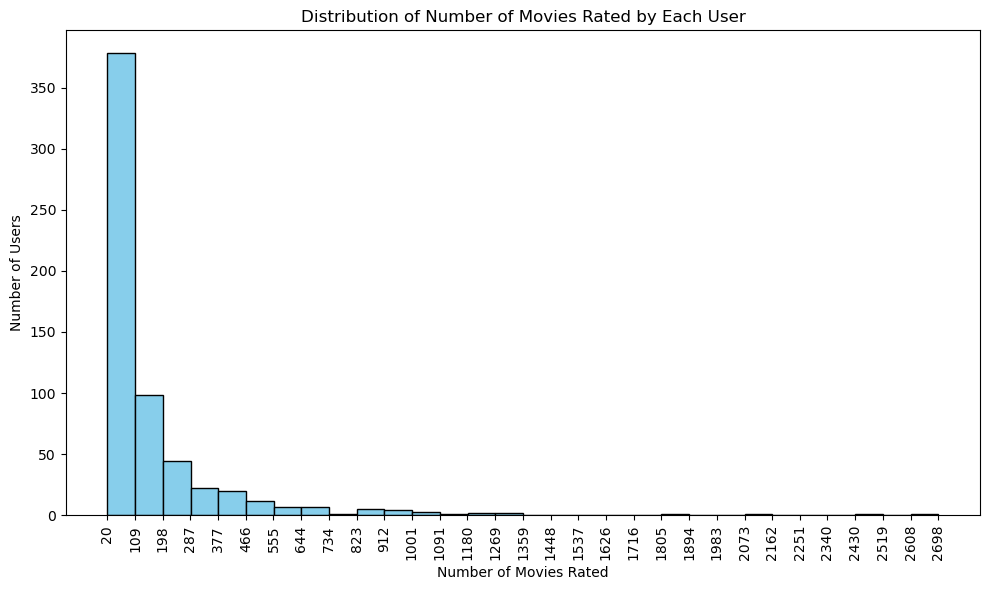

In [15]:
# Count how many users rate how many movies
user_rating_counts = df.groupby('userId').size()

# Plot the distribution
plt.figure(figsize=(10, 6))
num_bins = 30
counts, bins, _ = plt.hist(user_rating_counts, bins=num_bins, color='skyblue', edgecolor='black')
plt.xticks(bins.astype(int), rotation=90)
plt.title('Distribution of Number of Movies Rated by Each User')
plt.xlabel('Number of Movies Rated')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()

# Task 2: Implementation using Surprise Library

In [ ]:
pip install scikit-surprise

In [ ]:
from surprise import Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection import train_test_split

ModuleNotFoundError: No module named 'surprise'

In [ ]:
df1 = df[['userId', 'title', 'rating']]
df1.head()

,userId,title,rating
0,1,Toy Story (1995),4.000
1,1,Grumpier Old Men (1995),4.000
2,1,Heat (1995),4.000
3,1,Seven (a.k.a. Se7en) (1995),5.000
4,1,"Usual Suspects, The (1995)",5.000


In [ ]:
reader = Reader(rating_scale=(df1['rating'].min(), rating_df['rating'].max()))
data = Dataset.load_from_df(df1[['userId', 'title', 'rating']], reader=reader)

In [ ]:
# Split the data in train set and test set
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)
trainset.n_users, trainset.n_items

(610, 8790)

## User-based

In [ ]:
sim_options = {
    'name': 'cosine',
    'user_based': True  # User-based collaborative filtering
}
algo = KNNBasic(sim_options = sim_options, verbose= True)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9832


0.9832469279936744

## Item-based

In [ ]:
sim_options = {
    'name': 'cosine',
    'user_based': False  # Item-based collaborative filtering
}

algo = KNNBasic(sim_options=sim_options,  # Similarity options
               k=40,  # Maximum number of neighbors (default is 40)
               min_k=1,  # Minimum number of neighbors (default is 1)
               verbose=True)  # Print progress information

# Fit the model to the trainset
algo.fit(trainset)

# Make predictions on the testset
predictions = algo.test(testset)

# Evaluate the model using RMSE
accuracy.rmse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9778


0.9778007859615548

## Fine-tuning

In [ ]:
reader = Reader(rating_scale=(rating_popular_movie['rating'].min(), rating_popular_movie['rating'].max()))
data = Dataset.load_from_df(df2[['userId', 'title', 'rating']], reader=reader)
trainset, testset = train_test_split(data, test_size=0.25)
sim_options = {
    'name': 'cosine',
    'user_based': False  # Item-based collaborative filtering
}
minRMSE = 100
k = [20, 30, 40, 50, 60]
min_k = [1, 2, 3, 4, 5]
for i in k:
  for j in min_k:
    algo = KNNBasic(sim_options=sim_options,  # Similarity options
                  k=i,  # Maximum number of neighbors (default is 40)
                  min_k=j,  # Minimum number of neighbors (default is 1)
                  verbose=False)  # Print progress information

    # Fit the model to the trainset
    algo.fit(trainset)

    # Make predictions on the testset
    predictions = algo.test(testset)

    # Evaluate the model using RMSE
    a = accuracy.rmse(predictions)
    if minRMSE > a:
      minRMSE = a
      bestMaxK = i
      bestMinK = j
print(minRMSE)
print(bestMaxK)
print(bestMinK)


RMSE: 0.8964
RMSE: 0.8972
RMSE: 0.8972
RMSE: 0.8991
RMSE: 0.8987
RMSE: 0.8931
RMSE: 0.8939
RMSE: 0.8939
RMSE: 0.8959
RMSE: 0.8954
RMSE: 0.8939
RMSE: 0.8947
RMSE: 0.8947
RMSE: 0.8966
RMSE: 0.8962
RMSE: 0.8941
RMSE: 0.8949
RMSE: 0.8949
RMSE: 0.8969
RMSE: 0.8964
RMSE: 0.8945
RMSE: 0.8952
RMSE: 0.8952
RMSE: 0.8972
RMSE: 0.8967
0.8931451243544767
30
1


# Task 3: Implementation using numpy, pandas and sklearn

In [ ]:
from sklearn.metrics import pairwise_distances, root_mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and testing sets
trainset, testset = train_test_split(df, test_size=0.25, random_state=42)

## User-based

In [ ]:
# Prepare the interaction matrix for user-based filtering
interaction_matrix = trainset.pivot(index='userId', columns='movieId', values='rating')
interaction_matrix.fillna(0, inplace=True)

interaction_matrix

In [ ]:
# User-based similarity matrix using cosine similarity
user_similarity = 1 - pairwise_distances(interaction_matrix, metric="cosine")
np.fill_diagonal(user_similarity, 0)  # Avoid self-similarity

# Convert to DataFrame
user_similarity = pd.DataFrame(user_similarity, index=interaction_matrix.index, columns=interaction_matrix.index)
user_similarity

In [ ]:
# Define a function to find k nearest neighbors (this same function is used for item-based filtering too)
def get_k_nearest_neighbors(id, similarity_df, k):
    # Get the similarity scores between the target id and other ids
    similarity_scores = similarity_df.loc[id]       # Get the row

    # Sort the similarity scores in descending order and get the top k ids
    nearest_neighbors = similarity_scores.sort_values(ascending=False).head(k).index        # This index is custom index, not automatic numbering

    return nearest_neighbors.tolist()

In [ ]:
# Create a dictionary for k nearest neighbors for users
k = 10
user_neighbors = {}

# Iterate over each user
for user_id, _ in user_similarity.iterrows():
    user_neighbors[user_id] = get_k_nearest_neighbors(user_id, user_similarity, k)

user_neighbors[1]

In [ ]:
# Define function to predict rating for user-based collaborative filtering
def user_based_rating_prediction(user_id, movie_id):
    sim_sum = 0
    weighted_sum = 0

    # Find the neighbors of the user
    neighbors = user_neighbors.get(user_id)

    # Iterate over the neighbors
    for neighbor in neighbors:
        # Find the similarity score in the user_similarity matrix
        sim = user_similarity.loc[user_id, neighbor]
        # Find the rating of the neighbor for that movie in the interaction matrix
        rating = interaction_matrix.loc[neighbor, movie_id]
        
        if rating > 0:
            sim_sum += sim
            weighted_sum += sim * rating
    
    if sim_sum != 0:
        rounded_rating = round(weighted_sum / sim_sum * 2) / 2      # Round to the nearest 0.5
        return rounded_rating
    else:
        return 0

In [ ]:
user_based_pred = []

# Generate prediction for the test set
for user_id, movie_id in zip(testset['userId'], testset['movieId']):
    # If we already have data about the userId and movieId from the trainset
    if user_id in interaction_matrix.index and movie_id in interaction_matrix.columns:
        pred = user_based_rating_prediction(user_id, movie_id)
    # Else if we have no info about the userId or movieId, we cannot predict
    else:
        pred = 0

    user_based_pred.append(pred)

In [ ]:
# Calculate the rmse
true_ratings = testset['rating'].tolist()
rmse = root_mean_squared_error(true_ratings, user_based_pred)
print(f"User-Based Filtering RMSE: {rmse}")

In [ ]:
# Save to CSV file
comparison = pd.DataFrame({'True Rating': true_ratings, 'Predicted Rating': user_based_pred})
comparison.to_csv('user_based_ratings.csv', index=False)

## Item-based

In [ ]:
# Transpose the interaction matrix for item-based filtering
transpose_interaction_matrix = interaction_matrix.T
transpose_interaction_matrix

In [ ]:
# Item-based similarity matrix using cosine similarity
movie_similarity = 1 - pairwise_distances(transpose_interaction_matrix, metric="cosine")
np.fill_diagonal(movie_similarity, 0)  # Avoid self-similarity

# Convert to DataFrame
movie_similarity = pd.DataFrame(movie_similarity, index=transpose_interaction_matrix.index, columns=transpose_interaction_matrix.index)
movie_similarity

In [ ]:
# Create a dictionary for k nearest neighbors for the movies
k = 10
movie_neighbors = {}

# Iterate over each movie
for movie_id, _ in movie_similarity.iterrows():
    movie_neighbors[movie_id] = get_k_nearest_neighbors(movie_id, movie_similarity, k)

movie_neighbors[1]

In [ ]:
# Define function to predict rating for item-based collaborative filtering
def item_based_rating_prediction(movie_id, user_id):
    sim_sum = 0
    weighted_sum = 0

    # Find the neighbors of the movie
    neighbors = movie_neighbors.get(movie_id)

    # Iterate over the neighbors
    for neighbor in neighbors:
        # Find the similarity score in the movie_similarity matrix
        sim = movie_similarity.loc[movie_id, neighbor]
        # Find the rating of the neighbor for that movie in the interaction matrix
        rating = transpose_interaction_matrix.loc[neighbor, user_id]
        
        if rating > 0:
            sim_sum += sim
            weighted_sum += sim * rating
    
    if sim_sum != 0:
        rounded_rating = round(weighted_sum / sim_sum * 2) / 2      # Round to the nearest 0.5
        return rounded_rating
    else:
        return 0

In [ ]:
item_based_pred = []

# Generate prediction for the test set
for user_id, movie_id in zip(testset['userId'], testset['movieId']):
    # If we already have data about the userId and movieId from the trainset
    if user_id in interaction_matrix.index and movie_id in interaction_matrix.columns:
        pred = item_based_rating_prediction(movie_id, user_id, movie_neighbors, k)
    # Else if we have no info about the userId or movieId, we cannot predict:
    else:
        pred = 0

    item_based_pred.append(pred)

In [ ]:
# Calculate the rmse
true_ratings = testset['rating'].tolist()
rmse = root_mean_squared_error(true_ratings, item_based_pred)
print(f"Item-Based Filtering RMSE: {rmse}")

In [ ]:
# Save to CSV file
comparison = pd.DataFrame({'True Rating': true_ratings, 'Predicted Rating': item_based_pred})
comparison.to_csv('item_based_ratings.csv', index=False)

In [ ]:
# Extra

## Extra 1: Evaluate on the filtered set

In [ ]:
combine_movie_rating = df.dropna(axis = 0, subset = ['title'])
movie_ratingCount = (combine_movie_rating.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
movie_ratingCount.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [ ]:
rating_with_totalRatingCount = combine_movie_rating.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.000,Toy Story (1995),215
1,1,3,4.000,Grumpier Old Men (1995),52
2,1,6,4.000,Heat (1995),102
3,1,47,5.000,Seven (a.k.a. Se7en) (1995),203
4,1,50,5.000,"Usual Suspects, The (1995)",204


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(len(rating_with_totalRatingCount['movieId'].unique()))

9724


In [ ]:
popularity_threshold = 50
rating_popular_movie= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
print(len(rating_popular_movie['movieId'].unique()))
rating_popular_movie.head()

451


,userId,movieId,rating,title,totalRatingCount
0,1,1,4.000,Toy Story (1995),215
1,1,3,4.000,Grumpier Old Men (1995),52
2,1,6,4.000,Heat (1995),102
3,1,47,5.000,Seven (a.k.a. Se7en) (1995),203
4,1,50,5.000,"Usual Suspects, The (1995)",204


In [ ]:
df2 = rating_popular_movie[['userId', 'title', 'rating']]
df2.head()

,userId,title,rating
0,1,Toy Story (1995),4.000
1,1,Grumpier Old Men (1995),4.000
2,1,Heat (1995),4.000
3,1,Seven (a.k.a. Se7en) (1995),5.000
4,1,"Usual Suspects, The (1995)",5.000


In [ ]:
reader = Reader(rating_scale=(rating_popular_movie['rating'].min(), rating_popular_movie['rating'].max()))
data = Dataset.load_from_df(df2[['userId', 'title', 'rating']], reader=reader)
trainset, testset = train_test_split(data, test_size=0.25)
sim_options = {
    'name': 'cosine',
    'user_based': False  # Item-based collaborative filtering
}

algo = KNNBasic(sim_options=sim_options,  # Similarity options
               k=40,  # Maximum number of neighbors (default is 40)
               min_k=1,  # Minimum number of neighbors (default is 1)
               verbose=True)  # Print progress information

# Fit the model to the trainset
algo.fit(trainset)

# Make predictions on the testset
predictions = algo.test(testset)

# Evaluate the model using RMSE
accuracy.rmse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8927


0.8927408752123271

## Extra 2: Extra extra

In [ ]:
# Assuming 'algo' is your trained KNNBasic model
# and 'df1' is your original DataFrame

# Get a user ID and item title for prediction
user_id = 10  # Replace with the desired user ID
item_title = 'Toy Story (1995)'  # Replace with the desired item title

# Find the internal item ID for the given title
item_id = df1[df1['title'] == item_title]['title'].iloc[0]

# Make the prediction
prediction = algo.predict(uid=user_id, iid=item_id)

# Access the predicted rating
predicted_rating = prediction.est

print(f"Predicted rating for user {user_id} and item '{item_title}': {predicted_rating}")

Predicted rating for user 10 and item 'Toy Story (1995)': 3.0689947088640332


In [ ]:
from collections import defaultdict

def get_top_n_recommendations(movie_title, n=5):
    """
    Gets the top N similar movies based on a given movie title.

    Args:
        movie_title (str): The title of the input movie.
        n (int): The number of similar movies to recommend (default is 5).

    Returns:
        list: A list of tuples containing the recommended movie titles and their estimated similarity scores.
    """

    # Get the internal item ID for the input movie
    # Modified line to get the inner_id from trainset
    try:
        inner_id = algo.trainset.to_inner_iid(movie_title)
    except ValueError:
        print(f"Movie '{movie_title}' not found in the training set.")
        return []

    # Get neighbors (similar items) for the input movie
    neighbors = algo.get_neighbors(inner_id, k=n + 1)  # +1 to exclude the input movie itself

    # Get the movie titles for the neighbors
    similar_movies = [(algo.trainset.to_raw_iid(neighbor),
                       algo.trainset.to_raw_iid(neighbor)) for neighbor in neighbors]

    # Sort the recommendations by similarity (if available)
    similar_movies.sort(key=lambda x: x[1], reverse=True)

    return similar_movies[:n]  # Return the top N movies

# Example usage
input_movie = "Toy Story (1995)"
recommendations = get_top_n_recommendations(input_movie, n=5)

print(f"Top 5 similar movies to '{input_movie}':")
for movie_title, similarity_score in recommendations:
    print(f"- {movie_title}")

Top 5 similar movies to 'Toy Story (1995)':
- Toy Story 3 (2010)
- Toy Story 2 (1999)
- King's Speech, The (2010)
- Incredibles, The (2004)
- Close Encounters of the Third Kind (1977)
